# K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os
path=r'C:\Users\ANIL\Desktop\python\Datatatasets'
os.chdir(path)

In [3]:
dataset=pd.read_csv('business-operations-survey-2020-covid-19-csv.csv')
dataset.head(30)

,description,industry,level,size,line_code,value
0,Business status Alert Level 4: Fully operational,total,0,6�19 employees,C0301.01,6054
1,Business status Alert Level 4: Fully operational,total,0,20�49 employees,C0301.01,1650
2,Business status Alert Level 4: Fully operational,total,0,50�99 employees,C0301.01,735
3,Business status Alert Level 4: Fully operational,total,0,100+ employees,C0301.01,711
4,Business status Alert Level 4: Fully operational,"Agriculture, forestry, & fishing",1,total,C0301.01,2175
5,Business status Alert Level 4: Fully operational,Agriculture,2,total,C0301.01,1839
6,Business status Alert Level 4: Fully operational,Commercial fishing,2,total,C0301.01,18
7,Business status Alert Level 4: Fully operational,Forestry & logging,2,total,C0301.01,6
8,Business status Alert Level 4: Fully operational,"Agriculture, forestry, & fishing support services",2,total,C0301.01,312
9,Business status Alert Level 4: Fully operational,Mining,1,total,C0301.01,18


In [4]:
dataset.shape

(10058, 6)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10058 entries, 0 to 10057
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  10058 non-null  object
 1   industry     10058 non-null  object
 2   level        10058 non-null  int64 
 3   size         10058 non-null  object
 4   line_code    10058 non-null  object
 5   value        10058 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 471.6+ KB


In [6]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
def StrToFloat(x):
 dataset[x]=label_encoder.fit_transform(dataset[x])
 dataset[x].unique()
for i in dataset.columns:
 StrToFloat(i)

In [23]:
dataset.isnull().sum().sum()

0

In [8]:
dataset.columns

Index(['description', 'industry', 'level', 'size', 'line_code', 'value'], dtype='object')

In [25]:
dataset.description.unique()

array([ 42,  44,  43,  39,  41,  40,  36,  38,  37,  33,  35,  34,  75,
        74,  73,  67,  72,  68,  70,  71,  69,  61,  62,  57,  58,  59,
        60,  86,  84,  85,  80,  81,  82,  83, 213, 211, 212, 207, 208,
       209, 210,  66,  64,  63,  65,  98, 100,  97,  99,  94,  96,  93,
        95, 106, 108, 105, 107, 102, 104, 101, 103,  47,  46,  45,  53,
        52,  51,  56,  55,  54,  50,  49,  48,   2,   1,   0,   8,   7,
         6,  11,  10,   9,   5,   4,   3, 110, 113, 109, 112, 111, 116,
       114, 117, 115,  30,  32,  29,  31,  19,  16,  14,  15,  18,  13,
        12,  17, 125, 127, 126, 124, 123, 135, 137, 136, 134, 133, 120,
       122, 121, 119, 118, 130, 132, 131, 129, 128, 140, 142, 141, 139,
       138, 145, 147, 146, 144, 143, 150, 152, 151, 149, 148, 155, 157,
       156, 154, 153, 180, 182, 181, 179, 178, 175, 177, 176, 174, 173,
       185, 187, 186, 184, 183, 190, 192, 191, 189, 188, 170, 172, 171,
       169, 168, 195, 197, 196, 194, 193, 165, 167, 166, 164, 16

array([[<AxesSubplot:title={'center':'description'}>,
        <AxesSubplot:title={'center':'industry'}>],
       [<AxesSubplot:title={'center':'level'}>,
        <AxesSubplot:title={'center':'size'}>],
       [<AxesSubplot:title={'center':'line_code'}>,
        <AxesSubplot:title={'center':'value'}>]], dtype=object)

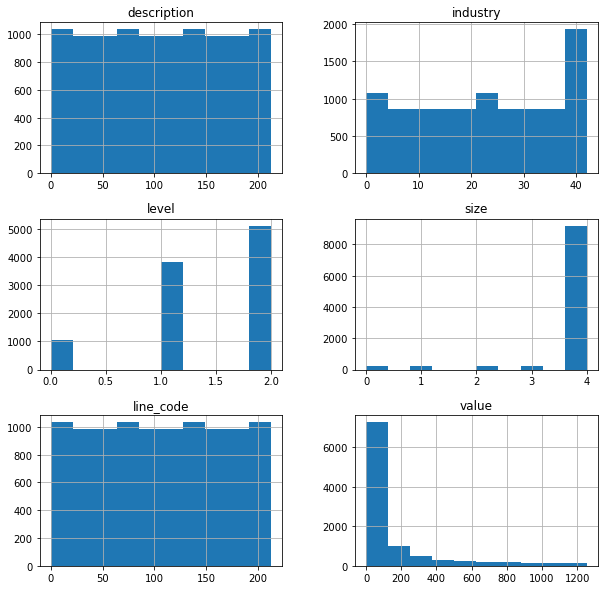

In [9]:
dataset.hist(figsize=(10,10))

In [10]:
dataset

,description,industry,level,size,line_code,value
0,42,42,0,3,0,1046
1,42,42,0,1,0,519
2,42,42,0,2,0,245
3,42,42,0,0,0,237
4,42,3,1,4,0,644
...,...,...,...,...,...,...
10053,201,10,1,4,213,7
10054,201,16,1,4,213,9
10055,201,5,1,4,213,0
10056,201,28,1,4,213,4


In [11]:
dataset.drop(['line_code'],axis=1)

,description,industry,level,size,value
0,42,42,0,3,1046
1,42,42,0,1,519
2,42,42,0,2,245
3,42,42,0,0,237
4,42,3,1,4,644
...,...,...,...,...,...
10053,201,10,1,4,7
10054,201,16,1,4,9
10055,201,5,1,4,0
10056,201,28,1,4,4


## 

In [12]:
#Extracting Independent and dependent Variable  

In [12]:
x= dataset.iloc[:, [1,2,4,5]].values  
y= dataset.iloc[:,3].values

In [13]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 


In [14]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

In [26]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=65)  
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=65)

In [16]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)
y_pred

array([4, 4, 4, ..., 4, 4, 4])

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  40    7    0    0    0]
 [  19   12    0    2   24]
 [  39   15    0    3    0]
 [  13    7    0    1   35]
 [   7    8    0    3 2280]]
              precision    recall  f1-score   support

           0       0.34      0.85      0.48        47
           1       0.24      0.21      0.23        57
           2       0.00      0.00      0.00        57
           3       0.11      0.02      0.03        56
           4       0.97      0.99      0.98      2298

    accuracy                           0.93      2515
   macro avg       0.33      0.41      0.35      2515
weighted avg       0.91      0.93      0.91      2515



C:\Users\ANIL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANIL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANIL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
